<a href="https://colab.research.google.com/github/Dhrupu/CNN/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import opendatasets as od


import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, AveragePooling2D
from tensorflow.keras.utils import image_dataset_from_directory

import os
import random

import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install opendatasets

In [ ]:
# Create the train dataset
train_ds = keras.utils.image_dataset_from_directory(
    directory=r'/content/drive/MyDrive/guava dataset/GuavaDiseaseDataset/train',
    labels='inferred',
    label_mode='categorical',
    batch_size=64,
    image_size=(256, 256)
)

Found 2647 files belonging to 3 classes.


In [ ]:

# Create the validation dataset
test_ds = keras.utils.image_dataset_from_directory(
    directory=r'/content/drive/MyDrive/guava dataset/GuavaDiseaseDataset/val',
    labels='inferred',
    label_mode='categorical',
    batch_size=64,
    image_size=(256, 256)
)

Found 755 files belonging to 3 classes.


In [ ]:
def visualize_images(path, num_images=5):

    # Get a list of image filenames
    image_filenames = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]

    if not image_filenames:
        raise ValueError("No images found in the specified path")

    # Select random images
    selected_images = random.sample(image_filenames, min(num_images, len(image_filenames)))

    # Create a figure and axes
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3), facecolor='white')

    # Display each image
    for i, image_filename in enumerate(selected_images):
        # Load image
        image_path = os.path.join(path, image_filename)
        image = plt.imread(image_path)

        # Display image
        axes[i].imshow(image)
        axes[i].axis('off')
        axes[i].set_title(image_filename)  # Set image filename as title

    # Adjust layout and display
    plt.tight_layout()
    plt.show()

In [ ]:
# Extrating the class labels
classes = train_ds.class_names

ANTHRACNOSE


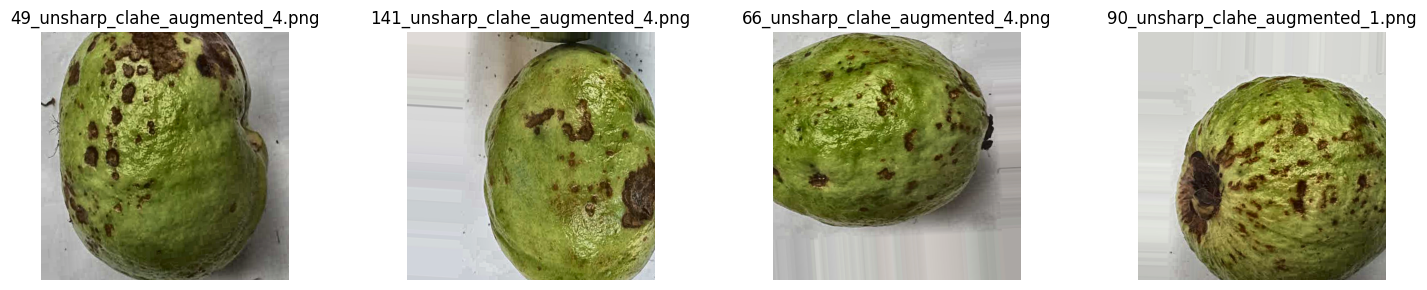

FRUIT_FLY


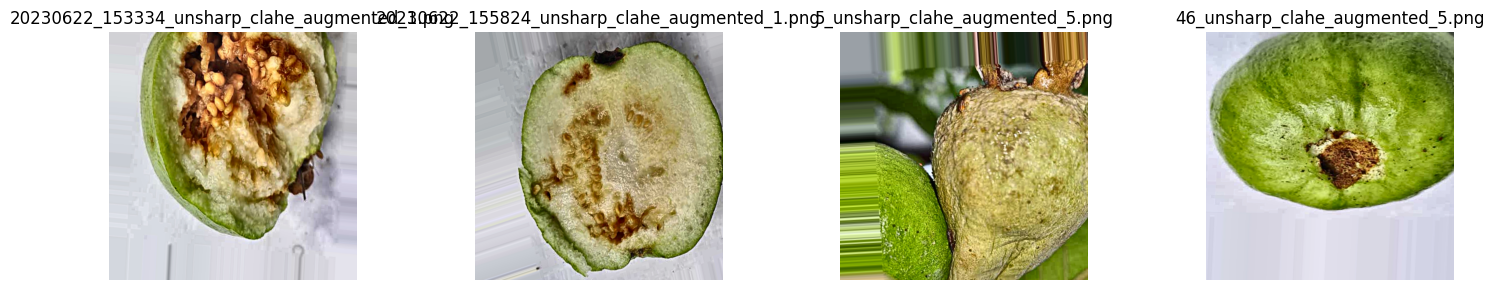

HEALTHY_GUAVA


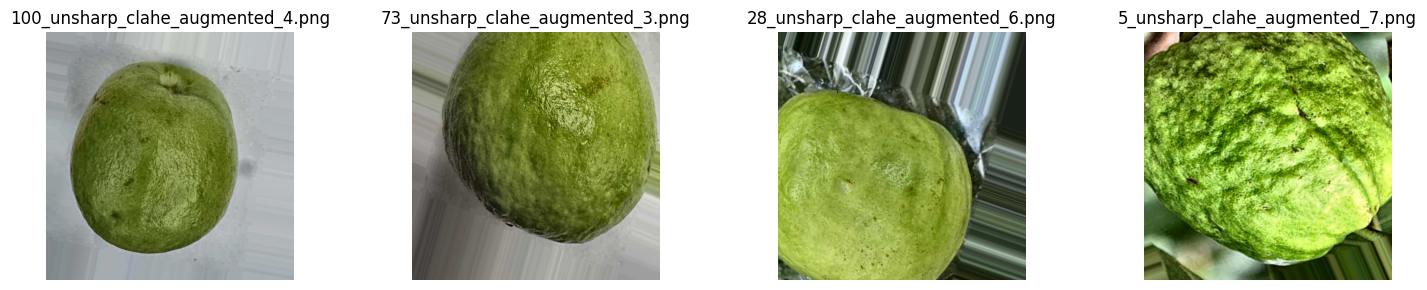

In [ ]:
# Iterating through each class to plot its images
for label in classes:

    # Specify the path containing the images to visualize
    path_to_visualize = f"/content/drive/MyDrive/guava dataset/GuavaDiseaseDataset/train/{label}"

    # Visualize 3 random images
    print(label.upper())
    visualize_images(path_to_visualize, num_images=4)

In [ ]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3, 3),activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(Conv2D(64,kernel_size=(3, 3),activation='relu'))
model.add(MaxPooling2D())


model.add(Conv2D(128,kernel_size=(3, 3),activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(64, activation='relu'))

model.add(Dense(32, activation='relu'))

model.add(Dense(3, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,849,539 (56.65 MB)

 Trainable params: 14,849,475 (56.65 MB)

 Non-trainable params: 64 (256.00 B)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds, epochs=10, batch_size = 128, validation_data=test_ds, verbose=1)

Epoch 1/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 946s 21s/step - accuracy: 0.4820 - loss: 4.5816 - val_accuracy: 0.3470 - val_loss: 16.5600
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 719s 16s/step - accuracy: 0.8346 - loss: 0.4605 - val_accuracy: 0.3483 - val_loss: 4.5875
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 706s 17s/step - accuracy: 0.9132 - loss: 0.2155 - val_accuracy: 0.6808 - val_loss: 0.7752
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 695s 16s/step - accuracy: 0.9541 - loss: 0.1301 - val_accuracy: 0.8026 - val_loss: 0.5410
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 723s 17s/step - accuracy: 0.9599 - loss: 0.1126 - val_accuracy: 0.8887 - val_loss: 0.3142
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 701s 17s/step - accuracy: 0.9801 - loss: 0.0529 - val_accuracy: 0.9205 - val_loss: 0.2332
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 710s 16s/step - accuracy: 0.9854 - loss: 0.0418 - val_accuracy: 0.9099 - val_loss: 0.3106
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 689s 16s/step - accuracy: 0.9884 - loss: 0.0384 - val_accuracy: 0

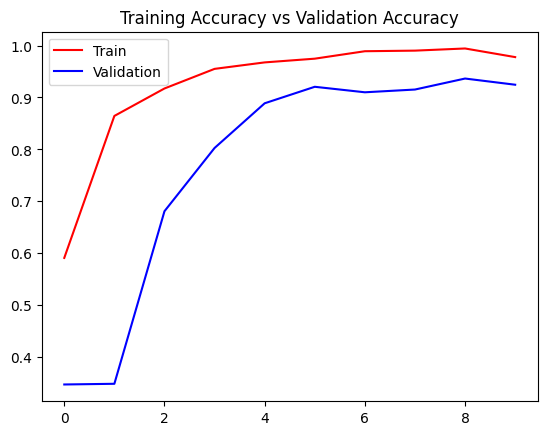

In [ ]:
plt.title('Training Accuracy vs Validation Accuracy')

plt.plot(history.history['accuracy'], color='red',label='Train')
plt.plot(history.history['val_accuracy'], color='blue',label='Validation')

plt.legend()

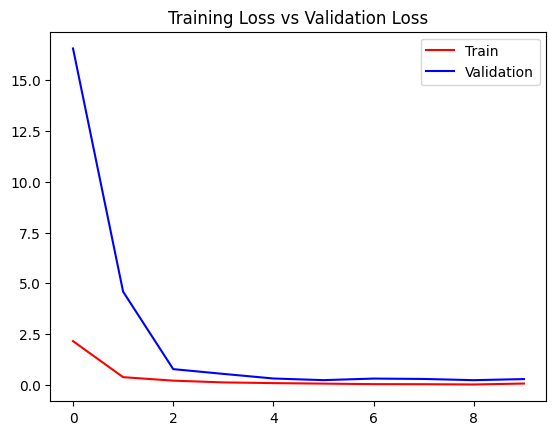

In [ ]:
plt.title('Training Loss vs Validation Loss')

plt.plot(history.history['loss'], color='red',label='Train')
plt.plot(history.history['val_loss'], color='blue',label='Validation')

plt.legend()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
import numpy as np

# Step 1: Get true labels (y_val) and predictions (y_pred)
y_val = []
y_pred = []

for images, labels in test_ds:
    # Append true labels
    y_val.extend(np.argmax(labels, axis=1))  # Convert one-hot encoded labels to class indices

    # Get model predictions
    y_pred_prob = model.predict(images)  # Get model predictions (probabilities)
    y_pred.extend(np.argmax(y_pred_prob, axis=1))  # Convert probabilities to class labels

# Step 2: Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='weighted')  # Weighted for class imbalance
recall = recall_score(y_val, y_pred, average='weighted')
f1 = f1_score(y_val, y_pred, average='weighted')

# Print Evaluation Metrics
print(f"Validation Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Step 3: Detailed classification report
print("\nClassification Report:")
print(classification_report(y_val, y_pred, target_names=classes))


2/2 ━━━━━━━━━━━━━━━━━━━━ 11s 5s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step
Validation Accuracy: 0.9245
Precision: 0.9287
Recall: 0.9245
F1 Score: 0.9243

Classification Report:
               precision    recall  f1-score   support

  Anthracnose       0.88      0.98      0.93       308
    fruit_fly       0.96      0.89      0.92       262
healthy_guava       0.96      0.88      0.92       185

     accuracy                           0.92       755
    macro avg       0.94      0.92      0.92       755
 weighted avg       0.93      0.92      0.92       755

